# Exploratory Data Analysis

**Business Case:** 

We must analyze the feautres present in the dataset, establish a correlation between the feautres and employee performance, and forecast the employee performance rating based on the feautres.

* Department Wise performance
* Percent count of employee department with performance rating
* Top 3 Important Factors effecting employee performance
* Checking the distribution of continuous features
* Check skewnwness and kurtosis
* Distribution of mean of data
* Distribution of standard deviation of data


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# for warnings 
import warnings
warnings.filterwarnings('ignore')


In [2]:
read_file=r'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls'
read_original_data=pd.read_excel(read_file)
read_original_data  

#To read the excel(.xls) file as a dataframe using pandas framework

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# DEPARTMENT WISE PERFORMANCE RATING

# Plot Used:

* Violinplot: It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
* CountPlot: Count plot is used to show the counts of observations in each categorical bin using bars.

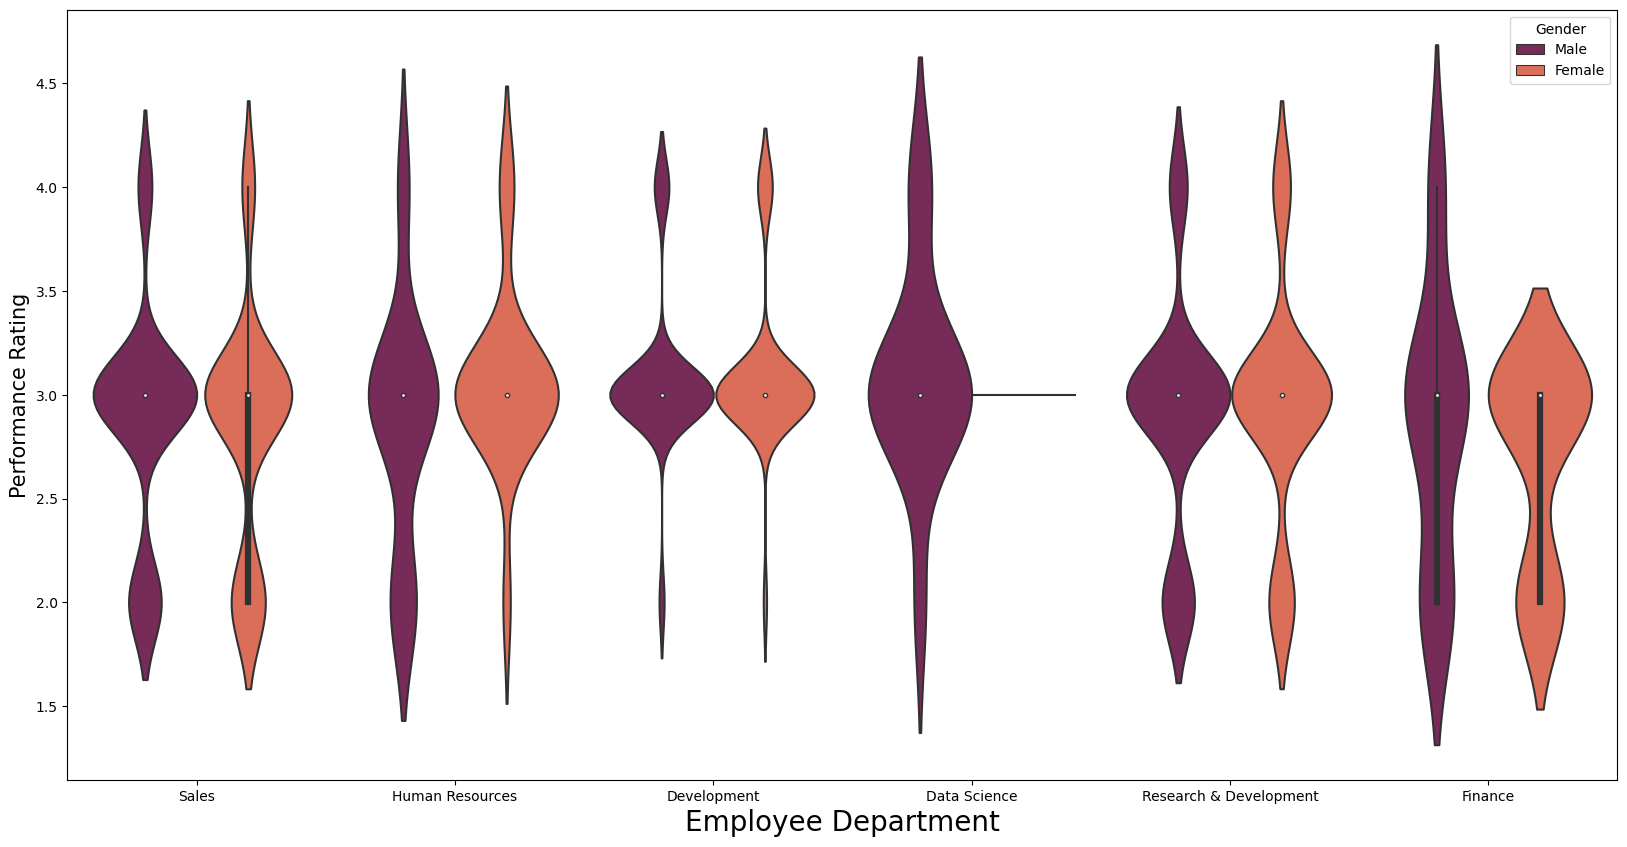

In [3]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=read_original_data.Gender,data=read_original_data,palette='rocket')
plt.xlabel('Employee Department',fontsize=20)
plt.ylabel('Performance Rating',fontsize=15)
plt.show()

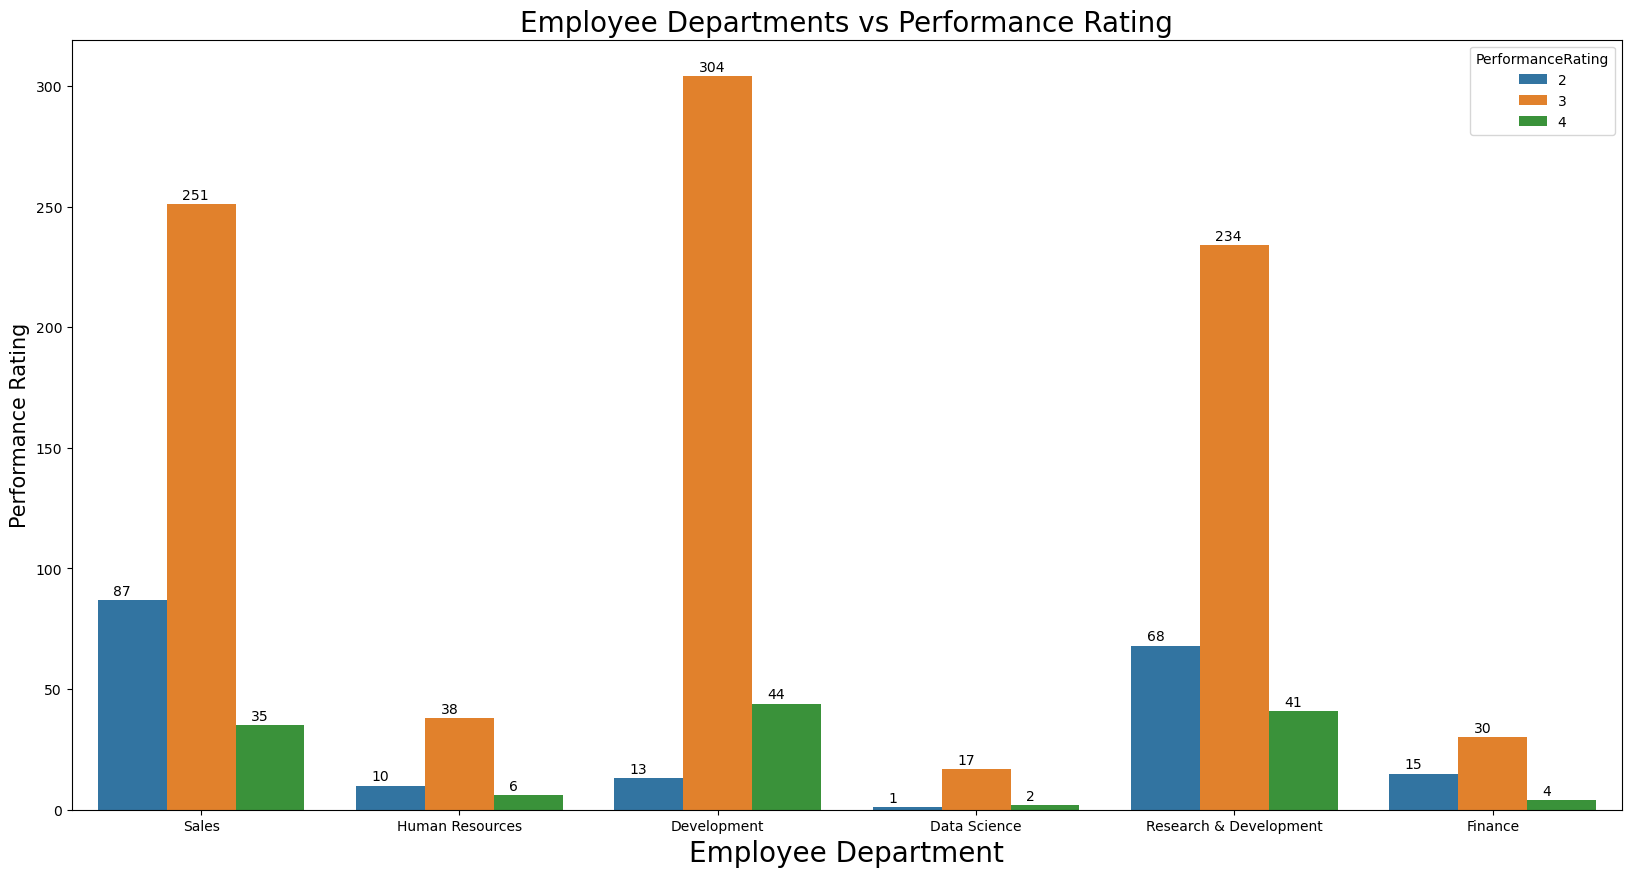

In [4]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=read_original_data.PerformanceRating,data=read_original_data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs Performance Rating',fontsize=20)
plt.xlabel('Employee Department',fontsize=20)
plt.ylabel('Performance Rating',fontsize=15)
plt.show()

# Observation:

From the above graph we can conclude that from the Employee Department , Development Department is showing High performance rating.
* **Sales:** The Number of employees who Performace rating level 3 is more in number. The male performance rating is slightly higher than female.
* **Human Resources:** The majority of the employees are lying under the level 3 performance. The female employees in HR department doing really well in their performance.

* **Development:** The maximum number of employees are level 3 performers.The gender-based performance is nearly same for both.

* **Data Science:** The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

* **Research & Development:** This department has more number of level 3 performers and performance with respect to male and female is almost the same

* **Finance:** Males are performing well in finance with respect to females and here also there are more of level 3 performers


## TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

### From visualisation file we get the top 3 factor affecting to the employee performance

* Emp Environment Satisfaction
* Emp Last Salary Hike Percent
* Emp Work Life Balance

### 1.Employee Environment Satisfaction

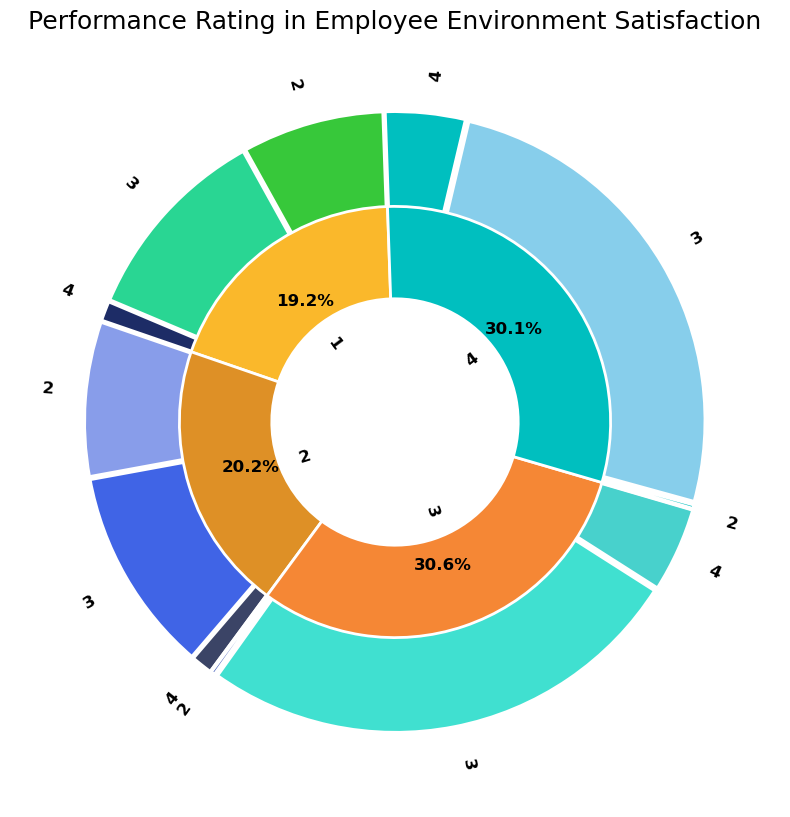

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Performance Rating in Employee Environment Satisfaction",fontsize=18)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        colors=["#37C83A","#29D693","#1D2C66",
                "#889DEA","#4064E6",'#3B4466',
                '#324EB3','turquoise','mediumturquoise',
                'c','skyblue','c',
               ],explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.82, textprops = {"fontsize":12,"fontweight":"bold"},startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))

plt.pie([230,242,367,361], radius=0.7,
        colors=['#FAB82B','#DE9026',"#F58735","c"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True,startangle=92)
plt.show()

### 2.Employee Last Salary Hike Percent

In [6]:
pd.crosstab(read_original_data['EmpLastSalaryHikePercent'],read_original_data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


### 3.Employee Work Life Balance

In [7]:
pd.crosstab(read_original_data['EmpWorkLifeBalance'],read_original_data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


**Observation:**

**1.Employee Enviroment satisfaction:**

* Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

**2.Employee Last Salary Hike Percent:**

* More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
* Employees whose salary hike percentage is in between 20-22%, have performance rating of 4

**3.Employee Work Life Balance:**

* In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees

## CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE

* Those feature continuous in nature only use this feature to plot a distribution

### Dist plot:

Distplot is used to observe how the data is distributed in a particular dataset.

In [8]:
# Get the continuous features
read_original_data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


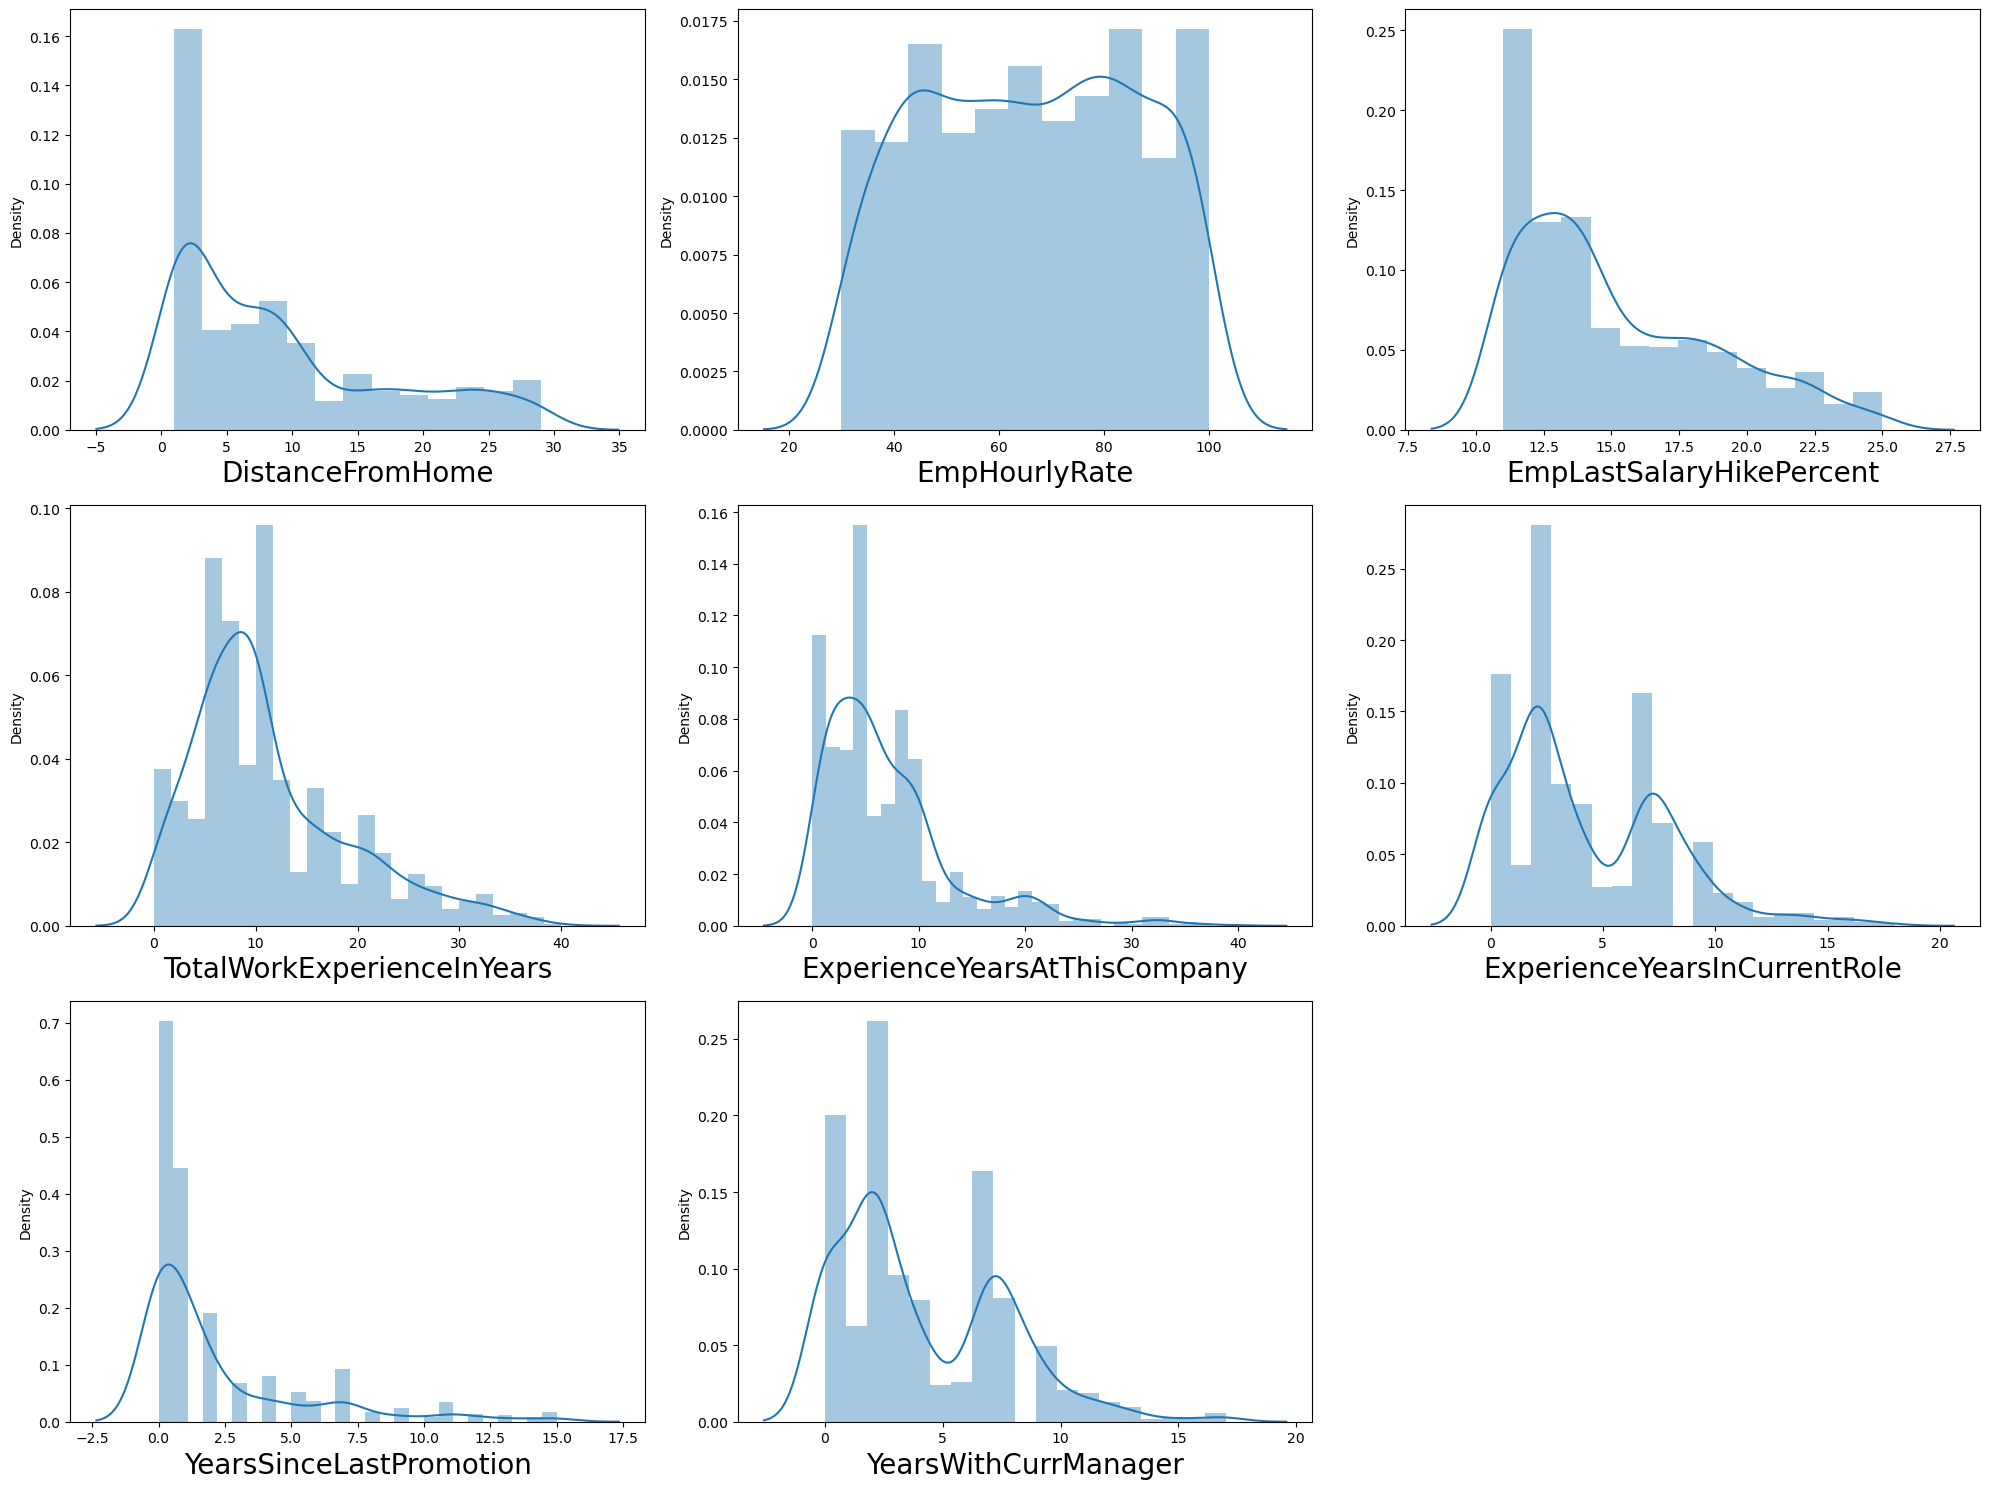

In [9]:
# Make a list of continuous feature in nature
continuous = read_original_data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

## CHECK THE SKEWNESS

### Skewness:

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

In [10]:
print('1.Distance From Home Feature Skewness:',read_original_data.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',read_original_data.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',read_original_data.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',read_original_data.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',read_original_data.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',read_original_data.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',read_original_data.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',read_original_data.YearsWithCurrManager.skew())

1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


From above all Feature skewness only one feature Year Since Last Promotion have skew so we need to do feature transformation in data preprocessing

## CHECK THE KURTOSIS

### Kurtosis:

kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [11]:
print('1.Distance From Home Feature kurtosis:',read_original_data.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',read_original_data.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',read_original_data.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',read_original_data.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',read_original_data.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',read_original_data.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',read_original_data.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',read_original_data.YearsWithCurrManager.kurtosis())

1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


From above all Feature kurtosis only high in two features experiance year at this company & Year Since Last Promotion have kutosis so we need to do feature transformation in data preprocessing

## DISTRIBUTION OF MEAN OF DATA

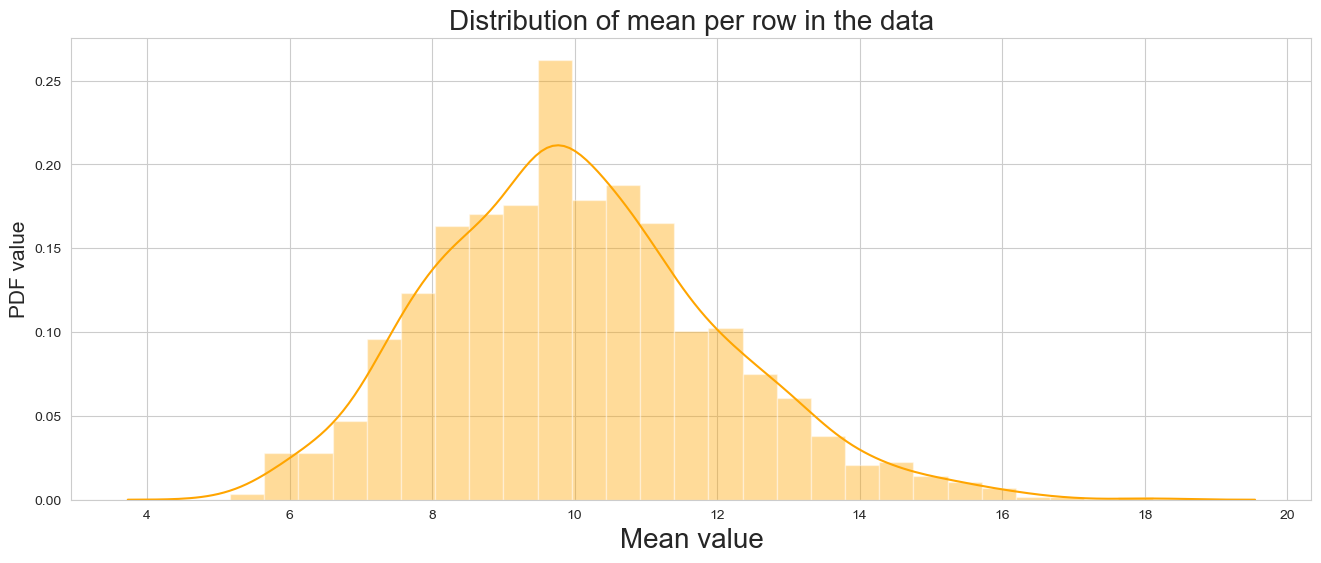

In [12]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = read_original_data.columns.values[0:27]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(read_original_data[features].mean(axis=1),color='ORANGE', kde=True)
plt.show()

### Observation:

* From the above graph close to guassian distribution with mean value 9.5

* From above graph we can say that around 80% feature mean lies between 8.5 to 10.5

## DISTRIBUTION OF STANDARD DEVIATION OF DATA

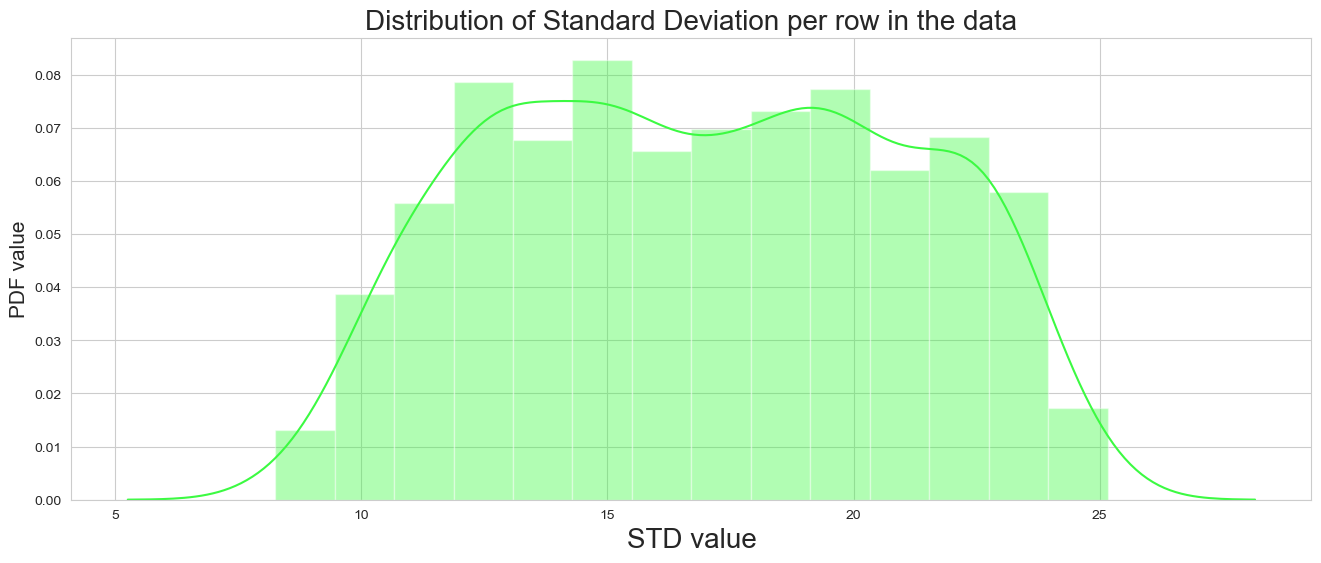

In [13]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = read_original_data.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(read_original_data[features].std(axis=1),color='#3CFA42', kde=True)
plt.show()